In [1]:
#Wrong version
import os
import ast
from collections import defaultdict

directory_path = r'/Users/lihaolin/Desktop/miniproj/LOBs'

def preprocess_line(line):
    """
Each row of data is preprocessed to ensure the correct format.
    """
    line = line.replace("Exch0", '"Exch0"')
    return line

def parse_line(line):
    """
Try to safely parse the preprocessed rows.
    """
    try:
        return ast.literal_eval(line)
    except SyntaxError as e:
        print(f"Error parsing line: {e}")
        return None

def read_and_parse_file(file_path):
    """
    Each line of the file is read and parsed.
    """
    parsed_data = []
    with open(file_path, 'r') as file:
        for line in file:
            preprocessed_line = preprocess_line(line.strip())
            data = parse_line(preprocessed_line)
            if data:
                parsed_data.append(data)
    return parsed_data

#A trader who wants to buy immediately may place an order at the lowest asking price, 
#while a trader who wants to sell immediately may place an order at the highest bid price.

def clean_lob_data(lob_data):
    cleaned_lob_data = []
    for entry in lob_data:
        time_stamp, exchange, order_book = entry
        bid_data, ask_data = order_book[0][1], order_book[1][1]
        highest_bid = max(bid_data, key=lambda x: x[0]) if bid_data else [None, None]
        lowest_ask = min(ask_data, key=lambda x: x[0]) if ask_data else [None, None]
        cleaned_entry = [time_stamp, exchange, [['bid', [highest_bid] if highest_bid != [None, None] else []], ['ask', [lowest_ask] if lowest_ask != [None, None] else []]]]
        cleaned_lob_data.append(cleaned_entry)
    return cleaned_lob_data

# Initialize a dictionary to store the data organized by day
cleaned_lob_data_by_day = defaultdict(list)

# Iterate over all files in the specified directory
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        print(f"Processing {file_path}...")
        lob_data = read_and_parse_file(file_path)
        cleaned_lob_data = clean_lob_data(lob_data)
        # file name 'UoB_Set01_2025-01-02LOBs.txt'
        date = filename.split('_')[2]
        cleaned_lob_data_by_day[date].extend(cleaned_lob_data)

# Store processed data with date key
for date, data in cleaned_lob_data_by_day.items():
    print(f"Date: {date}, Data: {data[:2]}") 


Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-05-13LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-02-27LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-06-30LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-06-20LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-04-15LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-02-18LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-03-21LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-03-31LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-01-14LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-03-07LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-03-17LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-01-22LOBs.txt...
Processing /Users/lihaolin/D

Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-02-05LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-05-21LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-04-08LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-03-03LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-03-13LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-06-12LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-06-02LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-01-08LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-02-14LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-02-04LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-05-30LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-05-20LOBs.txt...
Processing /Users/lihaolin/D

Date: 2025-01-20LOBs.txt, Data: [[0.0, 'Exch0', [['bid', []], ['ask', []]]], [2.759, 'Exch0', [['bid', [[209, 6]]], ['ask', []]]]]
Date: 2025-01-30LOBs.txt, Data: [[0.0, 'Exch0', [['bid', []], ['ask', []]]], [0.806, 'Exch0', [['bid', [[221, 3]]], ['ask', []]]]]
Date: 2025-03-05LOBs.txt, Data: [[0.0, 'Exch0', [['bid', []], ['ask', []]]], [0.775, 'Exch0', [['bid', [[256, 1]]], ['ask', []]]]]
Date: 2025-05-27LOBs.txt, Data: [[0.0, 'Exch0', [['bid', []], ['ask', []]]], [2.201, 'Exch0', [['bid', [[98, 7]]], ['ask', []]]]]
Date: 2025-02-13LOBs.txt, Data: [[0.0, 'Exch0', [['bid', []], ['ask', []]]], [0.837, 'Exch0', [['bid', []], ['ask', [[448, 4]]]]]]
Date: 2025-02-03LOBs.txt, Data: [[0.0, 'Exch0', [['bid', []], ['ask', []]]], [0.744, 'Exch0', [['bid', [[202, 4]]], ['ask', []]]]]
Date: 2025-05-22LOBs.txt, Data: [[0.0, 'Exch0', [['bid', []], ['ask', []]]], [1.767, 'Exch0', [['bid', [[1, 5]]], ['ask', []]]]]
Date: 2025-02-06LOBs.txt, Data: [[0.0, 'Exch0', [['bid', []], ['ask', []]]], [1.116, '

In [4]:
#Wrong version
import json

def save_data_by_day(cleaned_lob_data_by_day, output_directory):
    """
Save the LOB data organized by day to a text file.
- cleaned_lob_data_by_day: LOB data organized by day, in dictionary format.
- output_directory: The path to the directory where the output files are saved.
    """
    for date, data in cleaned_lob_data_by_day.items():
# Build output filename, including date
        output_filename = f"LOBs_{date}.txt"
        output_path = os.path.join(output_directory, output_filename)
        
        data_str = json.dumps(data, indent=4)
        
# write to file
        with open(output_path, 'w') as file:
            file.write(data_str)
        
        print(f"Data for {date} saved to {output_path}")

# Specify the directory path to the output file. Make sure it exists
output_directory = r'/Users/lihaolin/Desktop/miniproj/ProcessedLOBs'

# Call the function and save the processed data
save_data_by_day(cleaned_lob_data_by_day, output_directory)


Data for 2025-05-13LOBs.txt saved to /Users/lihaolin/Desktop/miniproj/ProcessedLOBs/LOBs_2025-05-13LOBs.txt.txt
Data for 2025-02-27LOBs.txt saved to /Users/lihaolin/Desktop/miniproj/ProcessedLOBs/LOBs_2025-02-27LOBs.txt.txt
Data for 2025-06-30LOBs.txt saved to /Users/lihaolin/Desktop/miniproj/ProcessedLOBs/LOBs_2025-06-30LOBs.txt.txt
Data for 2025-06-20LOBs.txt saved to /Users/lihaolin/Desktop/miniproj/ProcessedLOBs/LOBs_2025-06-20LOBs.txt.txt
Data for 2025-04-15LOBs.txt saved to /Users/lihaolin/Desktop/miniproj/ProcessedLOBs/LOBs_2025-04-15LOBs.txt.txt
Data for 2025-02-18LOBs.txt saved to /Users/lihaolin/Desktop/miniproj/ProcessedLOBs/LOBs_2025-02-18LOBs.txt.txt
Data for 2025-03-21LOBs.txt saved to /Users/lihaolin/Desktop/miniproj/ProcessedLOBs/LOBs_2025-03-21LOBs.txt.txt
Data for 2025-03-31LOBs.txt saved to /Users/lihaolin/Desktop/miniproj/ProcessedLOBs/LOBs_2025-03-31LOBs.txt.txt
Data for 2025-01-14LOBs.txt saved to /Users/lihaolin/Desktop/miniproj/ProcessedLOBs/LOBs_2025-01-14LOBs.

Data for 2025-02-20LOBs.txt saved to /Users/lihaolin/Desktop/miniproj/ProcessedLOBs/LOBs_2025-02-20LOBs.txt.txt
Data for 2025-05-14LOBs.txt saved to /Users/lihaolin/Desktop/miniproj/ProcessedLOBs/LOBs_2025-05-14LOBs.txt.txt
Data for 2025-06-18LOBs.txt saved to /Users/lihaolin/Desktop/miniproj/ProcessedLOBs/LOBs_2025-06-18LOBs.txt.txt
Data for 2025-03-27LOBs.txt saved to /Users/lihaolin/Desktop/miniproj/ProcessedLOBs/LOBs_2025-03-27LOBs.txt.txt
Data for 2025-01-02LOBs.txt saved to /Users/lihaolin/Desktop/miniproj/ProcessedLOBs/LOBs_2025-01-02LOBs.txt.txt
Data for 2025-06-26LOBs.txt saved to /Users/lihaolin/Desktop/miniproj/ProcessedLOBs/LOBs_2025-06-26LOBs.txt.txt
Data for 2025-04-03LOBs.txt saved to /Users/lihaolin/Desktop/miniproj/ProcessedLOBs/LOBs_2025-04-03LOBs.txt.txt
Data for 2025-03-18LOBs.txt saved to /Users/lihaolin/Desktop/miniproj/ProcessedLOBs/LOBs_2025-03-18LOBs.txt.txt
Data for 2025-02-21LOBs.txt saved to /Users/lihaolin/Desktop/miniproj/ProcessedLOBs/LOBs_2025-02-21LOBs.

In [3]:
import ast
import pandas as pd
import os
import re
from datetime import datetime

# Directory path
directory_path = r'/Users/lihaolin/Desktop/miniproj/LOBs'
dp='./'
# Function to parse bids and asks from the orders string
def parse_orders(orders_str):
    try:
    # use Python's ast (Abstract Syntax Trees) to evalute literal
        orders = ast.literal_eval(orders_str)
        bids=[]
        asks=[]
        for order_type, order_list in orders:
                if order_type == 'bid':
                    # Parse bids if present
                    bids = [(float(price), int(qty)) for price, qty in order_list]
                elif order_type == 'ask':
                    # Parse asks if present
                    asks = [(float(price), int(qty)) for price, qty in order_list]
        return bids, asks
    except ValueError as e:
        # Handle cases where the string cannot be evaluated
        print(f"Error parsing orders: {e}")
        return [], []
    
def preprocess_line(line):
    # Directly replace 'Exch0' with '"Exch0"' to ensure it's interpreted as a string
    # this is for ast.literal_eval. Because without "", Exch0 will trigger some errors in eval.
    line = line.replace('Exch0', '"Exch0"')
    return line

def load_data(directory_path):
    # Use regex to select filename pattern and identify the date
    file_pattern = re.compile(r'^UoB_Set01_(\d{4}-\d{2}-\d{2})LOBs\.txt$')
    data_rows = []  # List to collect data rows
    
    for filename in os.listdir(directory_path):
        match = file_pattern.match(filename)
        file_path = os.path.join(directory_path, filename)
        print(f"Processing {file_path}...")
        if match:
            date_str = match.group(1)
            date_obj = datetime.strptime(date_str, '%Y-%m-%d')
            file_path = os.path.join(directory_path, filename)
            
            with open(file_path, 'r') as file:
                for line in file:
                    # Directly evaluate the line as a Python list
                    data_list = ast.literal_eval(preprocess_line(line.strip()))
                    # Extract components directly from the list
                    timestamp, exchange, orders = data_list
                    bids, asks = parse_orders(str(orders))
                    # Prepare the row and add it to the list
                    row = {'Date': date_obj, 'Timestamp': timestamp, 'Exchange': exchange, 'Bids': bids, 'Asks': asks}
                    data_rows.append(row)   
    # Convert the list of rows into a DataFrame
    return pd.DataFrame(data_rows)

df=load_data(directory_path=directory_path)
print(df.head())

Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-05-13LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-02-27LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-06-30LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-06-20LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-04-15LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-02-18LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-03-21LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-03-31LOBs.txt...
Processing /Users/lihaolin/Desktop/miniproj/LOBs/UoB_Set01_2025-01-14LOBs.txt...


KeyboardInterrupt: 

In [5]:
import ast
import pandas as pd
import os
import re
from datetime import datetime
import concurrent.futures

# 目录路径
directory_path = r'/Users/lihaolin/Desktop/miniproj/LOBs'

# 解析订单
def parse_orders(orders_str):
    try:
        orders = ast.literal_eval(orders_str)
        bids = []
        asks = []
        for order_type, order_list in orders:
            if order_type == 'bid':
                bids = [(float(price), int(qty)) for price, qty in order_list]
            elif order_type == 'ask':
                asks = [(float(price), int(qty)) for price, qty in order_list]
        return bids, asks
    except ValueError as e:
        print(f"Error parsing orders: {e}")
        return [], []

# 预处理行
def preprocess_line(line):
    line = line.replace('Exch0', '"Exch0"')
    return line

# 加载单个文件
def load_file(file_path):
    file_pattern = re.compile(r'^UoB_Set01_(\d{4}-\d{2}-\d{2})LOBs\.txt$')
    data_rows = []  # 用于收集数据行
    filename = os.path.basename(file_path)
    match = file_pattern.match(filename)
    if match:
        date_str = match.group(1)
        date_obj = datetime.strptime(date_str, '%Y-%m-%d')
        with open(file_path, 'r') as file:
            for line in file:
                data_list = ast.literal_eval(preprocess_line(line.strip()))
                timestamp, exchange, orders = data_list
                bids, asks = parse_orders(str(orders))
                row = {'Date': date_obj, 'Timestamp': timestamp, 'Exchange': exchange, 'Bids': bids, 'Asks': asks}
                data_rows.append(row)
    return data_rows

# 并行加载数据
def load_data_concurrently(directory_path):
    files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]
    all_data_rows = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        future_to_file = {executor.submit(load_file, file): file for file in files}
        for future in concurrent.futures.as_completed(future_to_file):
            all_data_rows.extend(future.result())
    return pd.DataFrame(all_data_rows)

# 使用并行加载数据
df = load_data_concurrently(directory_path=directory_path)
print(df.head())


KeyboardInterrupt: 

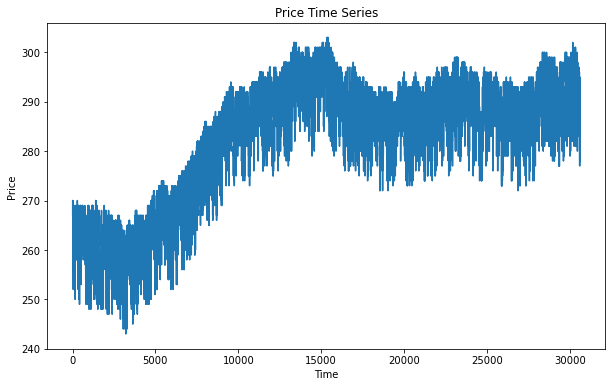

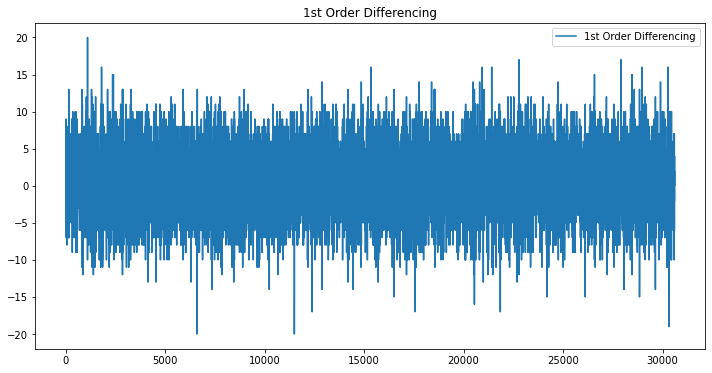

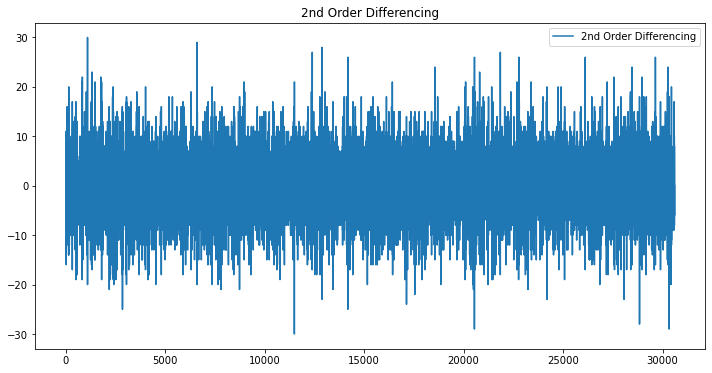

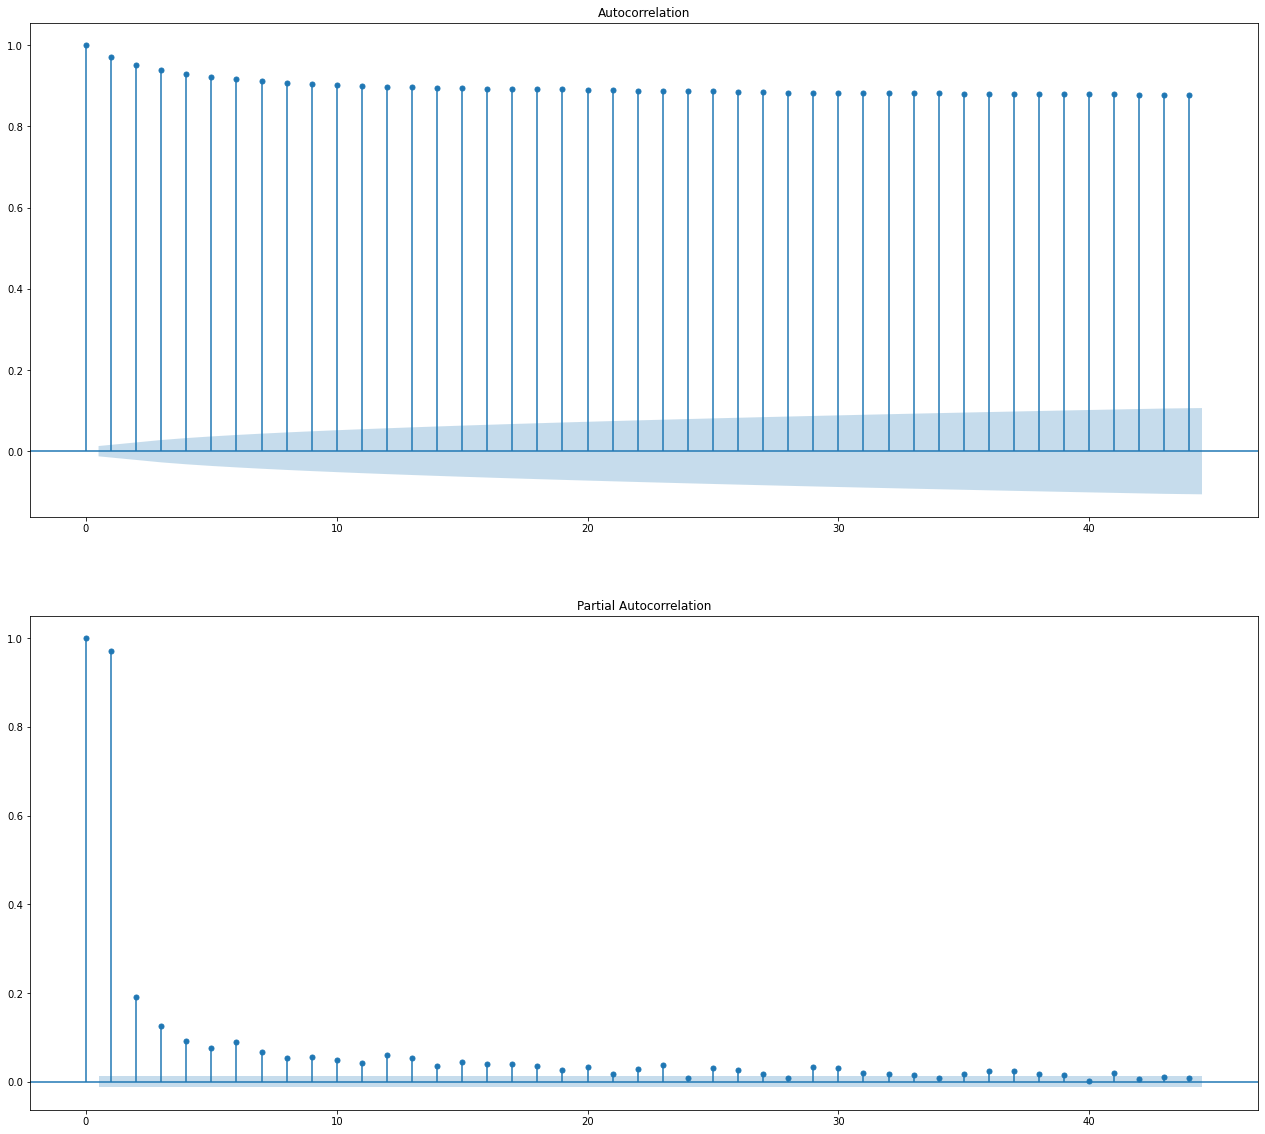

/Users/lihaolin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/lihaolin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/lihaolin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/lihaolin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autor

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                23811
Model:                ARIMA(21, 2, 1)   Log Likelihood              -59533.568
Date:                Thu, 22 Feb 2024   AIC                         119113.136
Time:                        14:35:28   BIC                         119298.925
Sample:                             0   HQIC                        119173.411
                              - 23811                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2960      0.006    -49.949      0.000      -0.308      -0.284
ar.L2         -0.2312      0.007    -35.369      0.000      -0.244      -0.218
ar.L3         -0.1973      0.007    -28.278      0.0

/Users/lihaolin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [39]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# 加载数据
file_path = '/Users/lihaolin/Desktop/miniproj/Tapes/UoB_Set01_2025-01-02tapes.csv'
df = pd.read_csv(file_path, sep=",", header=None, names=["Time", "Price", "Quantity"])
df.set_index('Time', inplace=True)

# 选择价格列作为时间序列数据
ts = df['Price']

plt.figure(figsize=(10, 6))
plt.plot(ts)
plt.title('Price Time Series')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()
#一阶
ts_diff1 = ts.diff(periods=1)
plt.figure(figsize=(12, 6))
plt.plot(ts_diff1, label='1st Order Differencing')
plt.title('1st Order Differencing')
plt.legend(loc='best')
plt.show()
#二阶
ts_diff2 = ts_diff1.diff(periods=1)
plt.figure(figsize=(12, 6))
plt.plot(ts_diff2, label='2nd Order Differencing')
plt.title('2nd Order Differencing')
plt.legend(loc='best')
plt.show()
# 绘制自相关和偏自相关图，帮助选择ARIMA参数
fig, ax = plt.subplots(2, 1, figsize=(22, 20))  # 这里设置figsize为宽12英寸，高10英寸
plot_acf(ts, ax=ax[0])  # 自相关图
plot_pacf(ts, ax=ax[1])  # 偏自相关图
plt.show()
# 基于观察选择ARIMA参数
p = 21  # AR项
d = 1  # 差分阶数
q = 1  # MA项

# 拟合ARIMA模型
model = ARIMA(ts, order=(p, d, q))
model_fit = model.fit()

# 打印模型摘要
print(model_fit.summary())

# 进行预测
forecast = model_fit.forecast(steps=5)
print(forecast)



In [14]:

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# 假设已经正确加载了数据
file_path = '/Users/lihaolin/Desktop/miniproj/Tapes/UoB_Set01_2025-01-02tapes.csv'
df = pd.read_csv(file_path, sep=",", header=None, names=["Time", "Price", "Quantity"])

# 直接使用时间作为索引，无需转换为Timedelta
df.set_index('Time', inplace=True)

# 选择价格列作为时间序列数据
ts = df['Price']
print(df)


           Price  Quantity
Time                      
10.881       267         1
11.067       269         1
11.222       267         2
12.338       270         2
13.733       267         3
...          ...       ...
30598.085    287         2
30598.085    288         2
30599.108    292         1
30599.728    290         1
30599.728    288         1

[23811 rows x 2 columns]


In [15]:

# 定义ARIMA模型参数
p = 1  # AR项
d = 1  # 差分阶数，确保时间序列的平稳性
q = 1  # MA项

# 拟合ARIMA模型
model = ARIMA(ts, order=(p, d, q))
model_fit = model.fit()

# 打印模型摘要
print(model_fit.summary())

# 进行预测
forecast = model_fit.forecast(steps=5)  # 预测未来5个时间点的价格
print(forecast)

/Users/lihaolin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/lihaolin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/lihaolin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                23811
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -59424.024
Date:                Thu, 22 Feb 2024   AIC                         118854.048
Time:                        09:47:31   BIC                         118878.281
Sample:                             0   HQIC                        118861.910
                              - 23811                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7146      0.005    131.711      0.000       0.704       0.725
ma.L1         -0.9739      0.002   -529.441      0.000      -0.977      -0.970
sigma2         8.6157      0.060    143.656      0.0

/Users/lihaolin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
